# COMP47670 Project 2
### Chungman Lee
### 23205535

# Task 1

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Download the two datasets(2008, 2016)

id: attendent ID

platz: rank

nation: nationality

jahrgang: birth year

ak: age group

ak_plazierung: rank in the age group

sex: gender

sex_plazierung: rank in the gender group

z5, z10, z15, z20, z25, z30, z35, z40: record at every 5 km

halbmarathon: half marathone record

netto: pure record of finish

brutto: record of finish inclucing waiting time

In [220]:
df_2008 = pd.read_csv("2008_data.csv")
df_2008

,id,platz,nation,jahrgang,ak,ak_plazierung,sex,sex_plazierung,z5,z10,z15,z20,z25,z30,z35,z40,halbmarathon,netto,brutto
0,2,903,DEU,1958,M50,41,M,875,00:20:15,00:40:39,01:01:05,01:21:23,01:41:56,02:02:44,02:24:04,02:45:57,01:25:52,02:55:24,02:56:07
1,3,4036,DEU,1979,MH,431,M,3847,00:23:12,00:46:41,01:09:40,01:32:56,01:56:28,02:20:12,02:44:13,03:08:59,01:38:04,03:19:11,03:20:57
2,4,15371,DEU,1965,M40,3251,M,13816,00:29:00,00:56:52,01:24:33,01:51:31,02:19:07,02:47:09,03:16:00,03:45:08,01:57:26,03:56:35,04:01:55
3,5,24445,DEU,1971,M35,3561,M,20804,00:28:41,00:59:25,01:29:42,01:59:14,02:34:23,03:05:03,03:37:34,04:10:49,02:05:49,04:24:25,04:25:10
4,6,1283,DEU,1968,M40,312,M,1245,00:20:59,00:41:40,01:02:16,01:22:50,01:43:42,02:04:46,02:26:35,02:49:05,01:27:20,02:58:51,02:59:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35727,54705,1430,DEU,1965,M40,348,M,1388,00:21:35,00:42:48,01:03:56,01:24:59,01:46:24,02:07:53,02:29:07,02:50:36,01:29:37,02:59:52,03:00:57
35728,54706,5037,FIN,1969,M35,1038,M,4768,00:24:14,00:49:31,01:14:02,01:38:46,02:03:03,02:27:29,02:51:08,03:14:27,01:44:12,03:24:01,03:24:05
35729,54707,21906,GBR,1980,WH,444,W,2992,00:30:09,01:00:20,01:30:46,02:00:40,02:30:41,03:00:26,03:30:55,04:02:16,02:07:12,04:15:33,04:19:21
35730,54708,32172,GBR,1971,M35,4231,M,26074,00:29:58,01:00:14,01:30:08,02:00:42,02:33:35,03:13:47,04:01:24,04:47:50,02:07:34,05:01:28,05:03:46


In [221]:
df_2016 = pd.read_csv("2016_data.csv")
df_2016

,id,platz,nation,jahrgang,ak,ak_plazierung,sex,sex_plazierung,z5,z10,z15,z20,z25,z30,z35,z40,halbmarathon,netto,brutto
0,507,11131,BRA,1977,35,282,W,1334,00:26:11,00:52:59,01:19:37,01:46:05,02:13:02,02:40:06,03:07:27,03:35:26,01:51:55,03:47:10,04:07:55
1,510,11870,DEU,1955,60,142,M,10391,00:24:11,00:49:23,01:14:31,01:40:03,02:06:25,02:35:12,03:05:21,03:36:44,01:45:41,03:49:36,03:51:28
2,513,31931,DEU,1952,60,780,M,24351,00:34:30,01:09:15,01:44:34,02:19:33,02:55:53,03:33:11,04:11:08,04:52:22,02:27:06,05:11:48,05:31:38
3,516,2084,DEU,1980,35,448,M,1973,00:21:33,00:43:05,01:04:20,01:25:31,01:47:21,02:09:49,02:32:24,02:55:56,01:30:13,03:05:38,03:10:29
4,519,22001,DEU,1975,40,3308,M,17932,00:26:57,00:53:22,01:19:54,01:47:00,02:14:26,02:43:34,03:26:31,04:06:47,01:52:51,04:21:04,04:52:27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35986,111618,15376,DEU,1953,60,232,M,13113,00:26:53,00:54:17,01:21:56,01:50:01,02:18:10,02:46:54,03:15:28,03:45:29,01:56:04,03:58:48,04:11:23
35987,111621,22467,DEU,1964,50,2676,M,18273,00:30:14,01:00:29,01:30:54,02:01:54,02:33:13,03:06:00,03:37:26,04:09:10,02:08:43,04:22:57,04:44:33
35988,111624,31748,DEU,1977,35,1211,W,7505,00:33:42,01:08:45,01:43:54,02:19:03,02:55:20,03:32:36,04:12:55,04:54:05,02:26:41,05:10:08,05:40:30
35989,111627,24367,DEU,1983,30,2467,M,19568,00:31:28,01:03:39,01:34:51,02:06:34,02:39:09,03:10:56,03:43:31,04:16:23,02:13:17,04:29:56,05:04:20


## Data Cleaning

For data cleaning, check the missing values and conver the records into timedelt format.

In [222]:
# Check the missing values
missing_values = df_2008.isnull().sum()

#Convert time columns to timedelta
time_columns = ['z5', 'z10', 'z15', 'z20', 'z25', 'z30', 'z35', 'z40', 'halbmarathon', 'netto', 'brutto']
for col in time_columns:
    df_2008[col] = pd.to_timedelta(df_2008[col])

# Check data types after conversion
data_types = df_2008.dtypes

missing_values, data_types

(id                0
 platz             0
 nation            8
 jahrgang          0
 ak                0
 ak_plazierung     0
 sex               0
 sex_plazierung    0
 z5                0
 z10               0
 z15               0
 z20               0
 z25               0
 z30               0
 z35               0
 z40               0
 halbmarathon      0
 netto             0
 brutto            0
 dtype: int64,
 id                          int64
 platz                       int64
 nation                     object
 jahrgang                    int64
 ak                         object
 ak_plazierung               int64
 sex                        object
 sex_plazierung              int64
 z5                timedelta64[ns]
 z10               timedelta64[ns]
 z15               timedelta64[ns]
 z20               timedelta64[ns]
 z25               timedelta64[ns]
 z30               timedelta64[ns]
 z35               timedelta64[ns]
 z40               timedelta64[ns]
 halbmarathon      timedel

In [223]:
# Check the missing values
missing_values = df_2016.isnull().sum()

#Convert time columns to approbriate format
time_columns = ['z5', 'z10', 'z15', 'z20', 'z25', 'z30', 'z35', 'z40', 'halbmarathon', 'netto', 'brutto']
for col in time_columns:
    df_2016[col] = pd.to_timedelta(df_2016[col])

# Check data types after conversion
data_types = df_2016.dtypes

missing_values, data_types

(id                0
 platz             0
 nation            3
 jahrgang          0
 ak                3
 ak_plazierung     0
 sex               2
 sex_plazierung    0
 z5                0
 z10               0
 z15               0
 z20               0
 z25               0
 z30               0
 z35               0
 z40               0
 halbmarathon      0
 netto             0
 brutto            0
 dtype: int64,
 id                          int64
 platz                       int64
 nation                     object
 jahrgang                    int64
 ak                         object
 ak_plazierung               int64
 sex                        object
 sex_plazierung              int64
 z5                timedelta64[ns]
 z10               timedelta64[ns]
 z15               timedelta64[ns]
 z20               timedelta64[ns]
 z25               timedelta64[ns]
 z30               timedelta64[ns]
 z35               timedelta64[ns]
 z40               timedelta64[ns]
 halbmarathon      timedel

There are not many missing values, so I just removed them.

In [224]:
# Remove rows with missing values from both datasets
df_2008 = df_2008.dropna()
df_2016 = df_2016.dropna()

shape_2008 = df_2008.shape
shape_2016 = df_2016.shape

shape_2008, shape_2016

((35724, 19), (35987, 19))

Remove examples whose ak and sex doesn't match because ak starts with the sex in 2008.(2016 doesn't include M or W information in ak feature)

In [226]:
condition1 = (df_2008['sex'] == 'M') & (df_2008['ak'].str.startswith('W'))
condition2 = (df_2008['sex'] == 'W') & (df_2008['ak'].str.startswith('M'))

df_2008 = df_2008[~condition1]
df_2008 = df_2008[~condition2]
df_2008

C:\Users\51150\AppData\Local\Temp\ipykernel_20208\3692040030.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2008 = df_2008[~condition2]


,id,platz,nation,jahrgang,ak,ak_plazierung,sex,sex_plazierung,z5,z10,z15,z20,z25,z30,z35,z40,halbmarathon,netto,brutto
0,2,903,DEU,1958,M50,41,M,875,0 days 00:20:15,0 days 00:40:39,0 days 01:01:05,0 days 01:21:23,0 days 01:41:56,0 days 02:02:44,0 days 02:24:04,0 days 02:45:57,0 days 01:25:52,0 days 02:55:24,0 days 02:56:07
1,3,4036,DEU,1979,MH,431,M,3847,0 days 00:23:12,0 days 00:46:41,0 days 01:09:40,0 days 01:32:56,0 days 01:56:28,0 days 02:20:12,0 days 02:44:13,0 days 03:08:59,0 days 01:38:04,0 days 03:19:11,0 days 03:20:57
2,4,15371,DEU,1965,M40,3251,M,13816,0 days 00:29:00,0 days 00:56:52,0 days 01:24:33,0 days 01:51:31,0 days 02:19:07,0 days 02:47:09,0 days 03:16:00,0 days 03:45:08,0 days 01:57:26,0 days 03:56:35,0 days 04:01:55
3,5,24445,DEU,1971,M35,3561,M,20804,0 days 00:28:41,0 days 00:59:25,0 days 01:29:42,0 days 01:59:14,0 days 02:34:23,0 days 03:05:03,0 days 03:37:34,0 days 04:10:49,0 days 02:05:49,0 days 04:24:25,0 days 04:25:10
4,6,1283,DEU,1968,M40,312,M,1245,0 days 00:20:59,0 days 00:41:40,0 days 01:02:16,0 days 01:22:50,0 days 01:43:42,0 days 02:04:46,0 days 02:26:35,0 days 02:49:05,0 days 01:27:20,0 days 02:58:51,0 days 02:59:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35727,54705,1430,DEU,1965,M40,348,M,1388,0 days 00:21:35,0 days 00:42:48,0 days 01:03:56,0 days 01:24:59,0 days 01:46:24,0 days 02:07:53,0 days 02:29:07,0 days 02:50:36,0 days 01:29:37,0 days 02:59:52,0 days 03:00:57
35728,54706,5037,FIN,1969,M35,1038,M,4768,0 days 00:24:14,0 days 00:49:31,0 days 01:14:02,0 days 01:38:46,0 days 02:03:03,0 days 02:27:29,0 days 02:51:08,0 days 03:14:27,0 days 01:44:12,0 days 03:24:01,0 days 03:24:05
35729,54707,21906,GBR,1980,WH,444,W,2992,0 days 00:30:09,0 days 01:00:20,0 days 01:30:46,0 days 02:00:40,0 days 02:30:41,0 days 03:00:26,0 days 03:30:55,0 days 04:02:16,0 days 02:07:12,0 days 04:15:33,0 days 04:19:21
35730,54708,32172,GBR,1971,M35,4231,M,26074,0 days 00:29:58,0 days 01:00:14,0 days 01:30:08,0 days 02:00:42,0 days 02:33:35,0 days 03:13:47,0 days 04:01:24,0 days 04:47:50,0 days 02:07:34,0 days 05:01:28,0 days 05:03:46


Convert 'netto' and 'halbmarathon' to minutes for later analysis and plotting

In [258]:
df_2008['netto_minutes'] = df_2008['netto'].dt.total_seconds() / 60
df_2008['halbmarathon_minutes'] = df_2008['halbmarathon'].dt.total_seconds() / 60
df_2016['netto_minutes'] = df_2016['netto'].dt.total_seconds() / 60
df_2016['halbmarathon_minutes'] = df_2016['halbmarathon'].dt.total_seconds() / 60
df_2008, df_2016

(          id  platz nation  jahrgang   ak  ak_plazierung sex  sex_plazierung  \
 29580  34673  22846    DEU      1974  M30           2330   M           19617   
 16852  18214   2669    CHE      1976  M30            415   M            2561   
 32751  41232   3394    DNK      1977  M30            505   M            3253   
 16857  18219  23149    DEU      1977  M30           2350   M           19835   
 22784  24897   5817    DNK      1976  M30            788   M            5495   
 ...      ...    ...    ...       ...  ...            ...  ..             ...   
 30593  36218  17695    DNK      1990  WJA              8   W            1996   
 2917    3492  30589    DNK      1989  WJA             27   W            5544   
 35230  49635  26185    DNK      1990  WJA             16   W            4124   
 31302  37449  15660    ZAF      1990  WJA              6   W            1610   
 28777  33414  30023    ITA      1990  WJA             25   W            5347   
 
                    z5    

# Task 2

## 1. characterization of data

1. Firstly, check the general descriptive statistics of finish time

In [266]:
# Calculating descriptive statistics for finish times
descriptive_stats = df_2008['netto_minutes'].describe()

# Converting the range from a single value to a (min, max) tuple
finish_time_range = (df_2008['netto_minutes'].min(), df_2008['netto_minutes'].max())

# Adding the range to the descriptive statistics
descriptive_stats['range'] = finish_time_range

descriptive_stats

count                        35716.0
mean                      247.016314
std                        41.102503
min                       123.983333
25%                            218.5
50%                       242.366667
75%                            272.9
max                            418.3
range    (123.98333333333333, 418.3)
Name: netto_minutes, dtype: object

The std is 41 minutes so it's a bit widely distributed. The performence gap of the participents could be large.

Midian is lower than the average a bit, and it means that the right tail(less performance) could be long.

As I mentioned above, the gap of the min and max is about 295 min which is large.

But more than halfof the people are passing the finish line between 218 and 272 min.(25%~75%)

Secondly, check histogram of the finish times(netto)

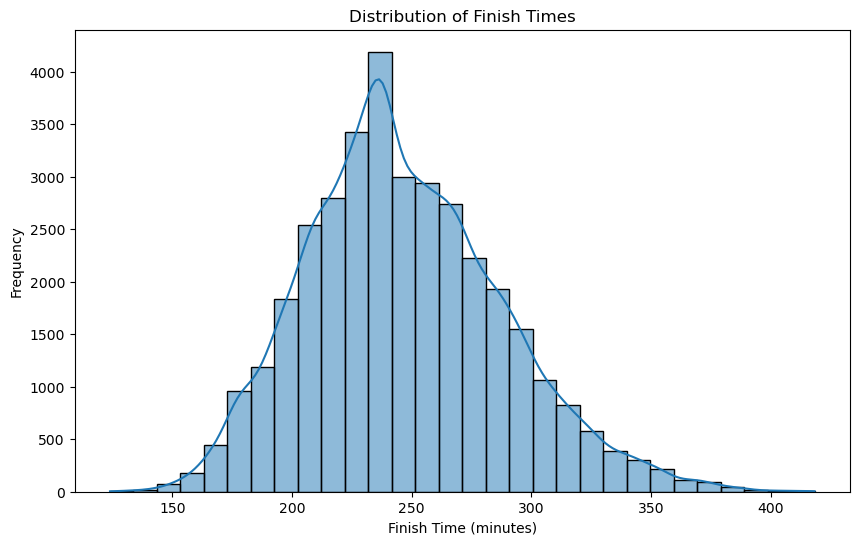

In [260]:
# Plotting the distribution of finish times
plt.figure(figsize=(10, 6))
sns.histplot(df_2008['netto_minutes'], bins=30, kde=True)
plt.title('Distribution of Finish Times')
plt.xlabel('Finish Time (minutes)')
plt.ylabel('Frequency')
plt.show()

This histogram is showing I've analized result in the previous description.

2. Box plot between finish time/gender pair and finish time/age group pair

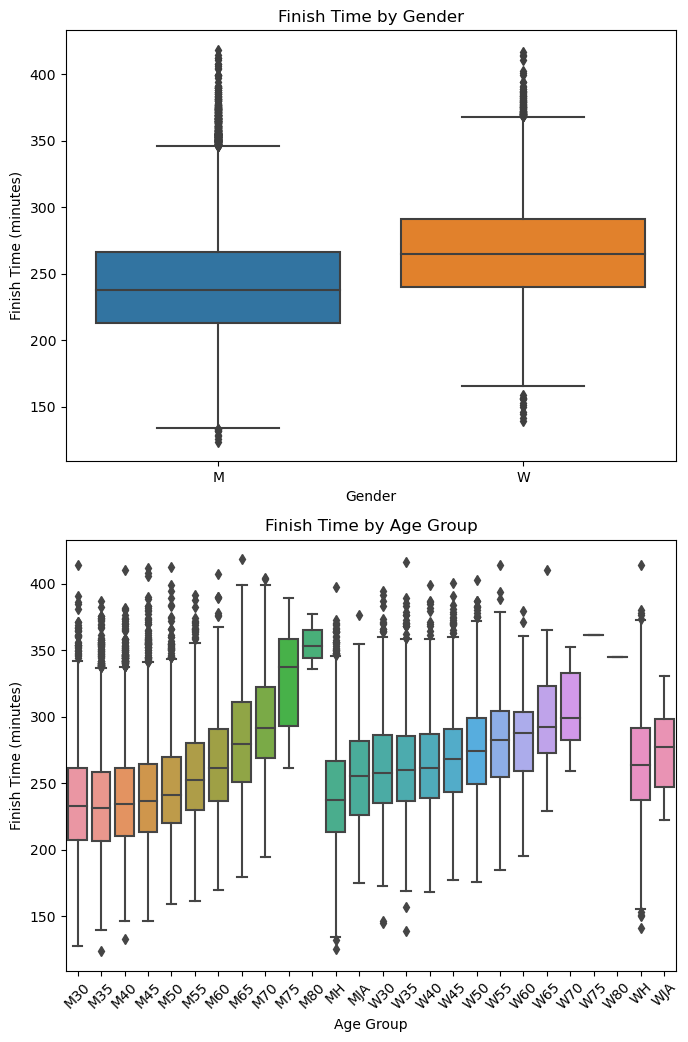

In [228]:
# sort with age group to see it easily
df_2008 =df_2008.sort_values(by = 'ak')

# Finish time by gender
plt.figure(figsize=(7, 15))
plt.subplot(3, 1, 1)
sns.boxplot(x='sex', y='netto_minutes', data=df_2008)
plt.title('Finish Time by Gender')
plt.ylabel('Finish Time (minutes)')
plt.xlabel('Gender')

# Finish time by age group
plt.subplot(3, 1, 2)
sns.boxplot(x='ak', y='netto_minutes', data=df_2008)
plt.title('Finish Time by Age Group')
plt.ylabel('Finish Time (minutes)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In these box blot, I can see generally male participants are faster than female because female's median and quartiles are higher than male's.

Basically, the participants are younger, the faster.

The upper outliers are more than the other, so noticeably slow participantes are more than the other.

## 2. Finish time and pacing

Sample only about records

In [229]:
df_points = df_2008.loc[:, 'z5':]
df_points = df_points.drop(['halbmarathon','brutto', 'netto'], axis=1)
df_points

,z5,z10,z15,z20,z25,z30,z35,z40,netto_minutes,halbmarathon_minutes
29580,0 days 00:27:19,0 days 00:53:59,0 days 01:20:53,0 days 01:47:02,0 days 02:15:36,0 days 02:47:26,0 days 03:26:34,0 days 04:02:47,258.833333,112.900000
16852,0 days 00:19:36,0 days 00:39:20,0 days 00:59:37,0 days 01:20:35,0 days 01:42:12,0 days 02:04:36,0 days 02:28:42,0 days 02:56:54,191.333333,85.200000
32751,0 days 00:20:43,0 days 00:41:37,0 days 01:02:38,0 days 01:24:57,0 days 01:48:07,0 days 02:12:05,0 days 02:36:55,0 days 03:03:18,195.566667,89.933333
16857,0 days 00:29:58,0 days 01:00:55,0 days 01:32:17,0 days 02:02:23,0 days 02:34:18,0 days 03:06:00,0 days 03:36:44,0 days 04:07:28,259.866667,129.133333
22784,0 days 00:25:12,0 days 00:50:00,0 days 01:14:07,0 days 01:38:15,0 days 02:02:39,0 days 02:27:13,0 days 02:51:38,0 days 03:16:10,207.383333,103.466667
...,...,...,...,...,...,...,...,...,...,...
30593,0 days 00:28:16,0 days 00:55:56,0 days 01:23:16,0 days 01:51:29,0 days 02:20:16,0 days 02:49:30,0 days 03:18:37,0 days 03:48:56,241.800000,117.650000
2917,0 days 00:30:28,0 days 01:00:55,0 days 01:31:43,0 days 02:01:38,0 days 02:35:43,0 days 03:13:52,0 days 03:52:16,0 days 04:35:02,291.050000,128.133333
35230,0 days 00:29:37,0 days 00:58:28,0 days 01:27:45,0 days 01:58:05,0 days 02:31:06,0 days 03:06:09,0 days 03:40:19,0 days 04:15:14,270.566667,124.933333
31302,0 days 00:27:53,0 days 00:56:13,0 days 01:24:22,0 days 01:51:40,0 days 02:20:45,0 days 02:49:58,0 days 03:17:23,0 days 03:45:51,237.216667,117.716667


1. Check the correlation and visualize in heatmap.

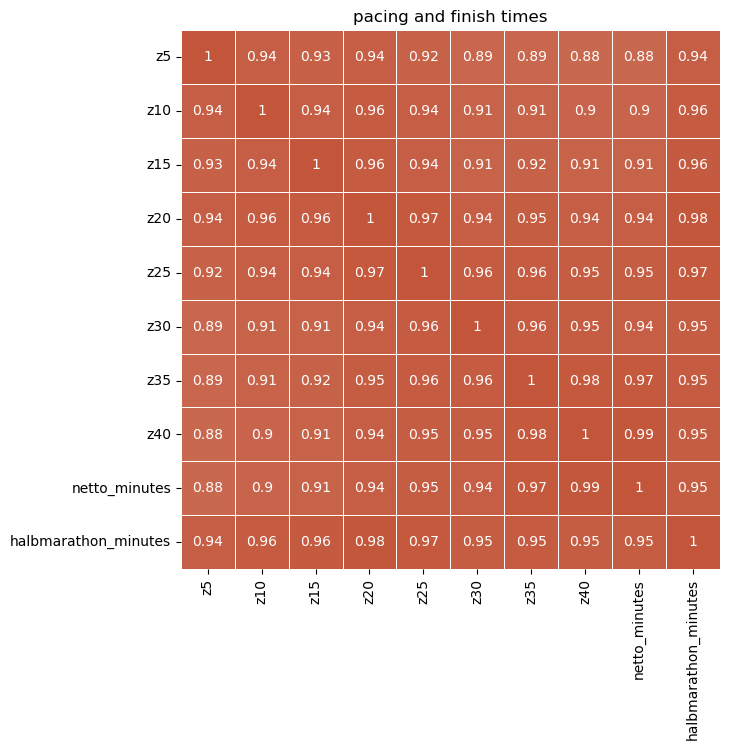

In [230]:
correlation = df_points.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(correlation, square=True, cbar=False, annot=True, cmap=cmap, linewidths=0.5, vmin=-1)
ax.set_title("pacing and finish times");

Of course, there is high correlations between records by distance.

Among them, beside of near the finish line, z25 has the highes correlations and z5 has the lowest correlations which means the negative pacing could be more effective.


2. Linear regresstion between halbmarathon_minutes and and netto_minutes

C:\Users\51150\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


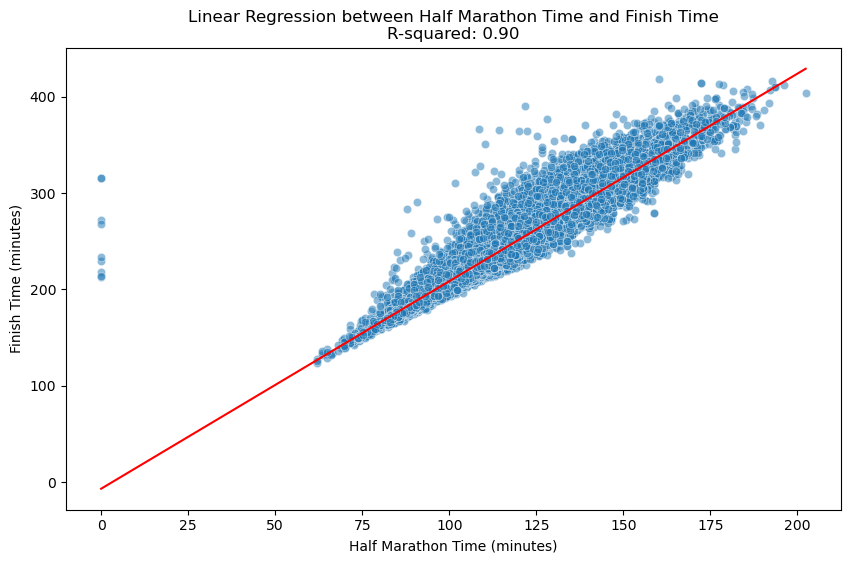

(2.155910918428349, 0.9004787602018012)

In [278]:
# Preparing the data for linear regression
X = df_2008[['halbmarathon_minutes']]
y = df_2008['netto_minutes']           

# Creating the linear regression model
model = LinearRegression()

# Fitting the model
model.fit(X, y)

# Getting the coefficients
slope = model.coef_[0]
intercept = model.intercept_

# R-squared value
r_squared = model.score(X, y)

# Predictions for visualization
x_fit = np.linspace(X.min(), X.max(), 100)
y_fit = model.predict(x_fit)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='halbmarathon_minutes', y='netto_minutes', data=df_2008, alpha=0.5)
plt.plot(x_fit, y_fit, color='red')  # Regression line
plt.title(f'Linear Regression between Half Marathon Time and Finish Time\nR-squared: {r_squared:.2f}')
plt.xlabel('Half Marathon Time (minutes)')
plt.ylabel('Finish Time (minutes)')
plt.show()

slope, r_squared

According to this linear regression, I could see there is a strong linear positive correlation between half marathon time and finish time because R-squared value is 0.90.

and the slope is 2.16, so if half marathon time increase 1 hour, the finish time increase 2 hours.

Further alalisis will be continued in the next task.

# Task 3

## 1. Evidence of the impact of pacing on finish time + 2. Findings with charts and table

In [231]:
# Calculate the second half marathon time
df_2008.loc[:, 'second_half_marathon_minutes'] = df_2008.loc[:, 'netto_minutes'] - df_2008.loc[:, 'halbmarathon_minutes']
df_2008

,id,platz,nation,jahrgang,ak,ak_plazierung,sex,sex_plazierung,z5,z10,...,z25,z30,z35,z40,halbmarathon,netto,brutto,netto_minutes,halbmarathon_minutes,second_half_marathon_minutes
29580,34673,22846,DEU,1974,M30,2330,M,19617,0 days 00:27:19,0 days 00:53:59,...,0 days 02:15:36,0 days 02:47:26,0 days 03:26:34,0 days 04:02:47,0 days 01:52:54,0 days 04:18:50,0 days 04:24:10,258.833333,112.900000,145.933333
16852,18214,2669,CHE,1976,M30,415,M,2561,0 days 00:19:36,0 days 00:39:20,...,0 days 01:42:12,0 days 02:04:36,0 days 02:28:42,0 days 02:56:54,0 days 01:25:12,0 days 03:11:20,0 days 03:11:57,191.333333,85.200000,106.133333
32751,41232,3394,DNK,1977,M30,505,M,3253,0 days 00:20:43,0 days 00:41:37,...,0 days 01:48:07,0 days 02:12:05,0 days 02:36:55,0 days 03:03:18,0 days 01:29:56,0 days 03:15:34,0 days 03:17:14,195.566667,89.933333,105.633333
16857,18219,23149,DEU,1977,M30,2350,M,19835,0 days 00:29:58,0 days 01:00:55,...,0 days 02:34:18,0 days 03:06:00,0 days 03:36:44,0 days 04:07:28,0 days 02:09:08,0 days 04:19:52,0 days 04:19:58,259.866667,129.133333,130.733333
22784,24897,5817,DNK,1976,M30,788,M,5495,0 days 00:25:12,0 days 00:50:00,...,0 days 02:02:39,0 days 02:27:13,0 days 02:51:38,0 days 03:16:10,0 days 01:43:28,0 days 03:27:23,0 days 03:32:32,207.383333,103.466667,103.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30593,36218,17695,DNK,1990,WJA,8,W,1996,0 days 00:28:16,0 days 00:55:56,...,0 days 02:20:16,0 days 02:49:30,0 days 03:18:37,0 days 03:48:56,0 days 01:57:39,0 days 04:01:48,0 days 04:04:10,241.800000,117.650000,124.150000
2917,3492,30589,DNK,1989,WJA,27,W,5544,0 days 00:30:28,0 days 01:00:55,...,0 days 02:35:43,0 days 03:13:52,0 days 03:52:16,0 days 04:35:02,0 days 02:08:08,0 days 04:51:03,0 days 04:51:49,291.050000,128.133333,162.916667
35230,49635,26185,DNK,1990,WJA,16,W,4124,0 days 00:29:37,0 days 00:58:28,...,0 days 02:31:06,0 days 03:06:09,0 days 03:40:19,0 days 04:15:14,0 days 02:04:56,0 days 04:30:34,0 days 04:33:57,270.566667,124.933333,145.633333
31302,37449,15660,ZAF,1990,WJA,6,W,1610,0 days 00:27:53,0 days 00:56:13,...,0 days 02:20:45,0 days 02:49:58,0 days 03:17:23,0 days 03:45:51,0 days 01:57:43,0 days 03:57:13,0 days 04:02:28,237.216667,117.716667,119.500000


1. Firstly, check the box plot between pacing and finish time(general / gender group / age group

Define a method to visualize box plot

In [232]:
def box_pacing_by_group(df):
    # Visualize the pacing impact on finish time
    plt.figure(figsize=(14, 20))

    # Finish time by pacing type
    plt.subplot(3, 1, 1)
    sns.boxplot(x='pacing_type', y='netto_minutes', data=df)
    plt.title('Finish Time by Pacing Type')
    plt.ylabel('Finish Time (minutes)')
    plt.xlabel('Pacing Type')

    # Finish time by pacing type and gender
    plt.subplot(3, 1, 2)
    sns.boxplot(x='pacing_type', y='netto_minutes', hue='sex', data=df)
    plt.title('Finish Time by Pacing Type and Gender')
    plt.ylabel('Finish Time (minutes)')
    plt.xlabel('Pacing Type')

    # Finish time by pacing type and finish time
    plt.subplot(3, 1, 3)
    sns.boxplot(x='pacing_type', y='netto_minutes', hue='ak', data=df)
    plt.title('Finish Time by Pacing Type and Gender')
    plt.ylabel('Finish Time (minutes)')
    plt.xlabel('Pacing Type')

    plt.tight_layout()
    plt.show()

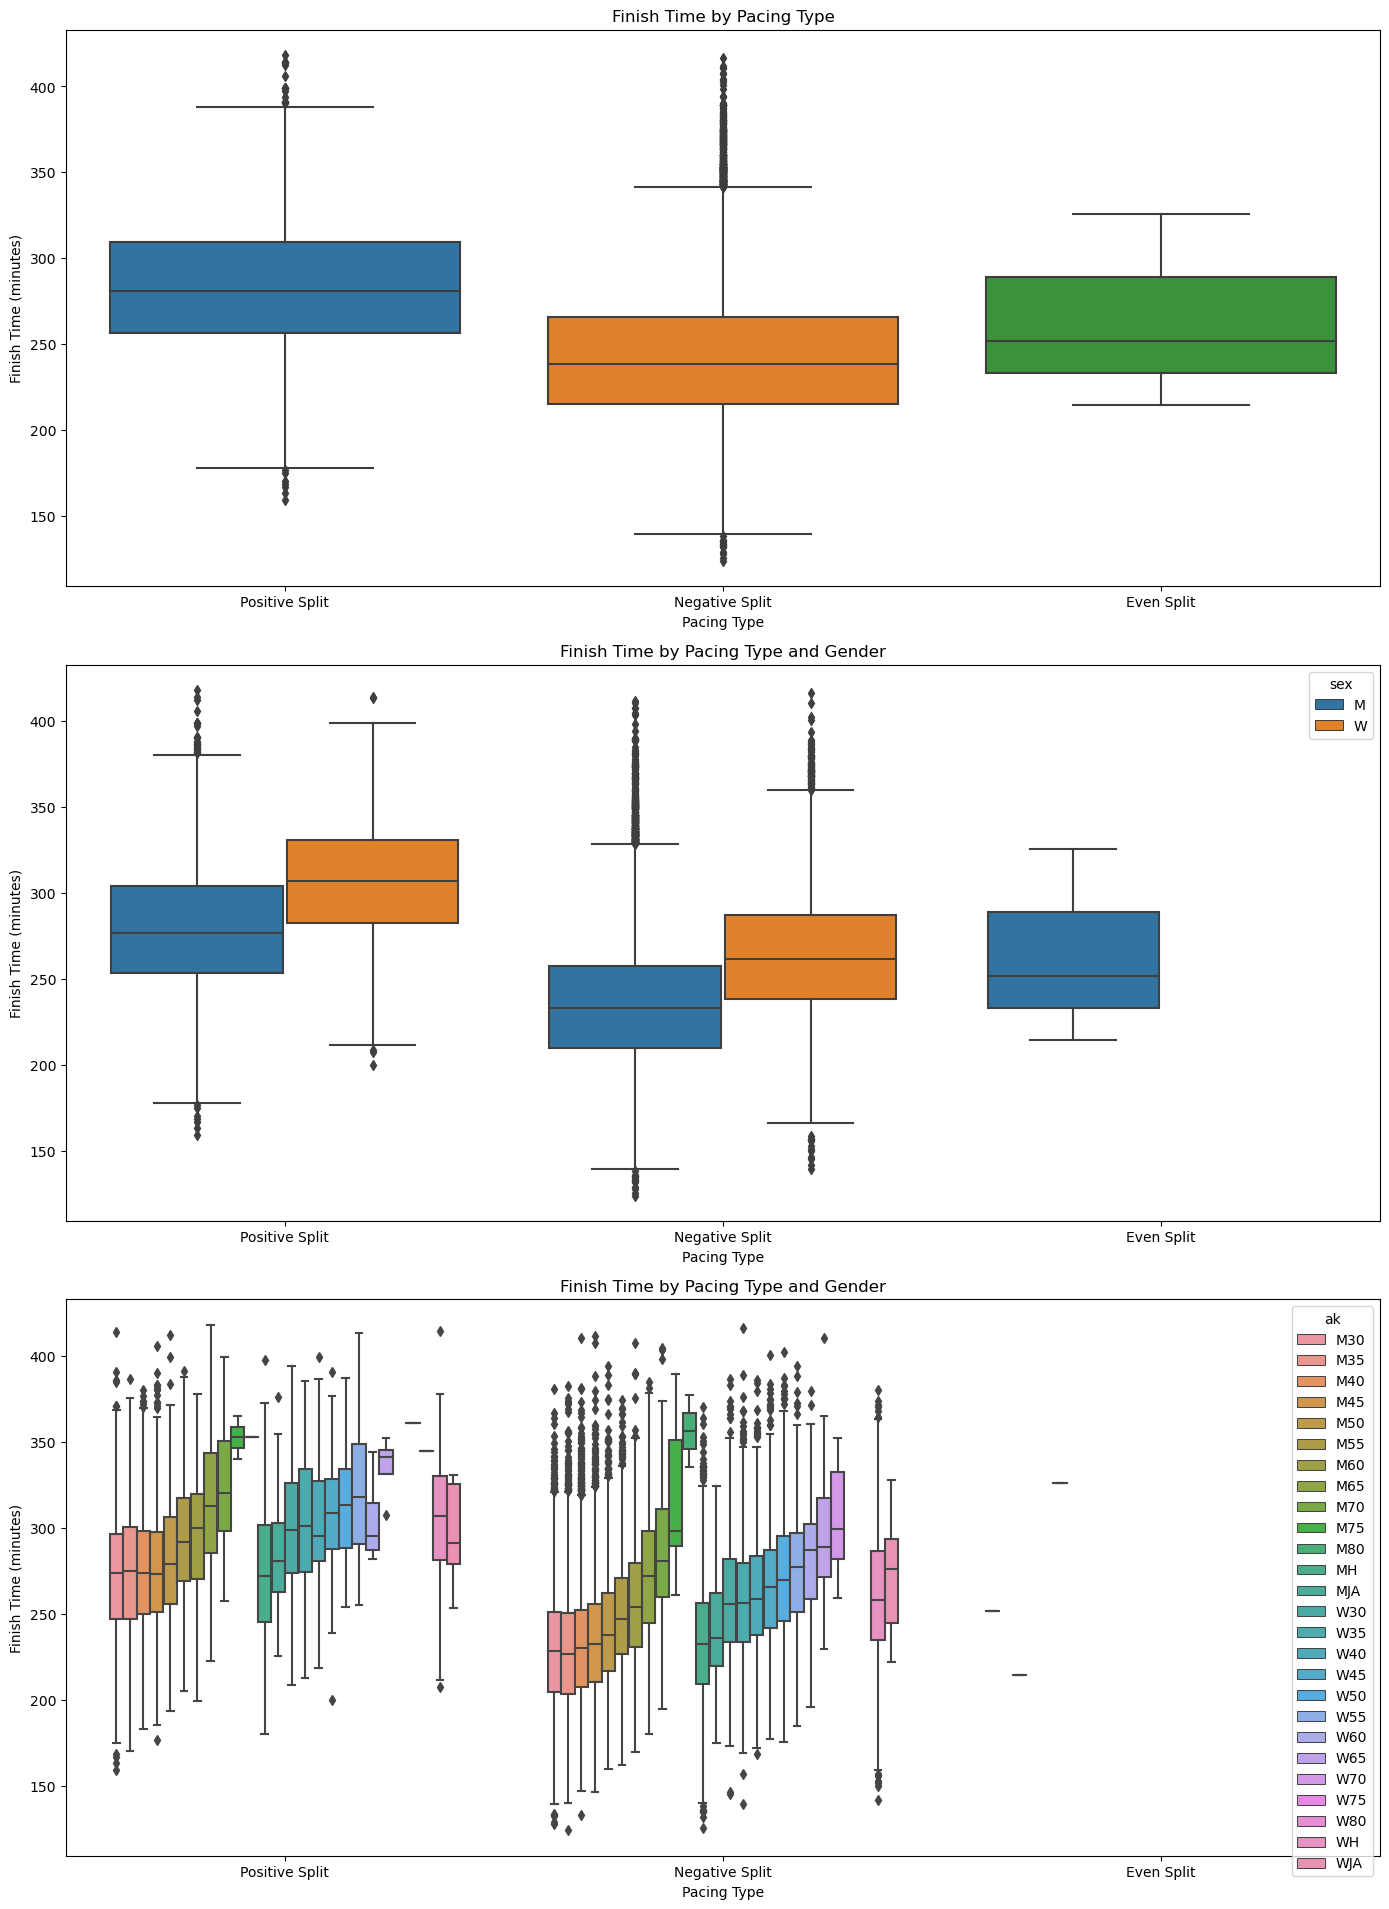

In [233]:
# Define pacing categories
conditions = [
    (df_2008['second_half_marathon_minutes'] < df_2008['halbmarathon_minutes'] * 1.2),
    ((df_2008['second_half_marathon_minutes'] >= df_2008['halbmarathon_minutes'] * 1.2) & (df_2008['second_half_marathon_minutes'] <= df_2008['halbmarathon_minutes'] * 1.2)),
    (df_2008['second_half_marathon_minutes'] > df_2008['halbmarathon_minutes'] * 1.2)
]
choices = ['Negative Split','Even Split', 'Positive Split']

# Re-define pacing categories with numpy imported
df_2008['pacing_type'] = np.select(conditions, choices)

box_pacing_by_group(df_2008)

This box plots clearly show that the negative split is much effective followed by even, and then positive generally.

But when I see the group age, for old people, positive split is more effective

2. Calculate and visualize  the number of the pacing strategy by age group / gender with bar plot. 

Define a method for this.

In [234]:
def bar_pacing(df, target):
    # count the pacing
    pacing_counts = df.groupby([target, 'pacing_type']).size().unstack()
    print(pacing_counts)

    # visualize the bar graph
    pacing_counts.plot(kind='bar', stacked=True)
    plt.title(f'Number of Runners by Pacing Type and {target}')
    plt.xlabel(target)
    plt.ylabel('Number of Runners')
    plt.show()

Perform the task

pacing_type  Even Split  Negative Split  Positive Split
sex                                                    
M                   3.0         24246.0          4069.0
W                   NaN          6779.0           619.0


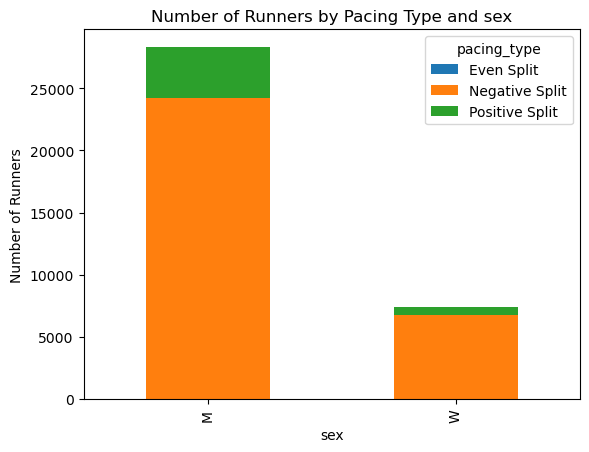

pacing_type  Even Split  Negative Split  Positive Split
ak                                                     
M30                 1.0          2725.0           452.0
M35                 NaN          3917.0           585.0
M40                 1.0          5289.0           803.0
M45                 NaN          4432.0           687.0
M50                 NaN          2851.0           447.0
M55                 1.0          1451.0           270.0
M60                 NaN           653.0           137.0
M65                 NaN           288.0            86.0
M70                 NaN            82.0            25.0
M75                 NaN             9.0             2.0
M80                 NaN             2.0             1.0
MH                  NaN          2437.0           532.0
MJA                 NaN           110.0            42.0
W30                 NaN           872.0            82.0
W35                 NaN          1054.0            97.0
W40                 NaN          1494.0         

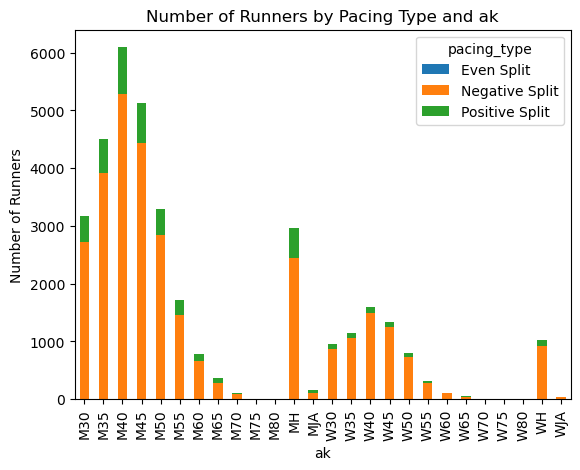

In [235]:
bar_pacing(df_2008, 'sex');
bar_pacing(df_2008, 'ak');

in this plot, I could see that most of the people take the negative pacing generally even older people.

Women tends to take negative split more than men.

3. Separate the elite athlets and others and check and analize

In [237]:
# calculate top 1%
top_1_percent_time = df_2008['netto'].quantile(0.01)

# add a column in it
df_2008['is_elite'] = df_2008['netto'] <= top_1_percent_time
df_2008

,id,platz,nation,jahrgang,ak,ak_plazierung,sex,sex_plazierung,z5,z10,...,z35,z40,halbmarathon,netto,brutto,netto_minutes,halbmarathon_minutes,second_half_marathon_minutes,pacing_type,is_elite
29580,34673,22846,DEU,1974,M30,2330,M,19617,0 days 00:27:19,0 days 00:53:59,...,0 days 03:26:34,0 days 04:02:47,0 days 01:52:54,0 days 04:18:50,0 days 04:24:10,258.833333,112.900000,145.933333,Positive Split,False
16852,18214,2669,CHE,1976,M30,415,M,2561,0 days 00:19:36,0 days 00:39:20,...,0 days 02:28:42,0 days 02:56:54,0 days 01:25:12,0 days 03:11:20,0 days 03:11:57,191.333333,85.200000,106.133333,Positive Split,False
32751,41232,3394,DNK,1977,M30,505,M,3253,0 days 00:20:43,0 days 00:41:37,...,0 days 02:36:55,0 days 03:03:18,0 days 01:29:56,0 days 03:15:34,0 days 03:17:14,195.566667,89.933333,105.633333,Negative Split,False
16857,18219,23149,DEU,1977,M30,2350,M,19835,0 days 00:29:58,0 days 01:00:55,...,0 days 03:36:44,0 days 04:07:28,0 days 02:09:08,0 days 04:19:52,0 days 04:19:58,259.866667,129.133333,130.733333,Negative Split,False
22784,24897,5817,DNK,1976,M30,788,M,5495,0 days 00:25:12,0 days 00:50:00,...,0 days 02:51:38,0 days 03:16:10,0 days 01:43:28,0 days 03:27:23,0 days 03:32:32,207.383333,103.466667,103.916667,Negative Split,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30593,36218,17695,DNK,1990,WJA,8,W,1996,0 days 00:28:16,0 days 00:55:56,...,0 days 03:18:37,0 days 03:48:56,0 days 01:57:39,0 days 04:01:48,0 days 04:04:10,241.800000,117.650000,124.150000,Negative Split,False
2917,3492,30589,DNK,1989,WJA,27,W,5544,0 days 00:30:28,0 days 01:00:55,...,0 days 03:52:16,0 days 04:35:02,0 days 02:08:08,0 days 04:51:03,0 days 04:51:49,291.050000,128.133333,162.916667,Positive Split,False
35230,49635,26185,DNK,1990,WJA,16,W,4124,0 days 00:29:37,0 days 00:58:28,...,0 days 03:40:19,0 days 04:15:14,0 days 02:04:56,0 days 04:30:34,0 days 04:33:57,270.566667,124.933333,145.633333,Negative Split,False
31302,37449,15660,ZAF,1990,WJA,6,W,1610,0 days 00:27:53,0 days 00:56:13,...,0 days 03:17:23,0 days 03:45:51,0 days 01:57:43,0 days 03:57:13,0 days 04:02:28,237.216667,117.716667,119.500000,Negative Split,False


Visulaize the bar plot

pacing_type  Even Split  Negative Split  Positive Split
is_elite                                               
False               3.0         30669.0          4686.0
True                NaN           356.0             2.0


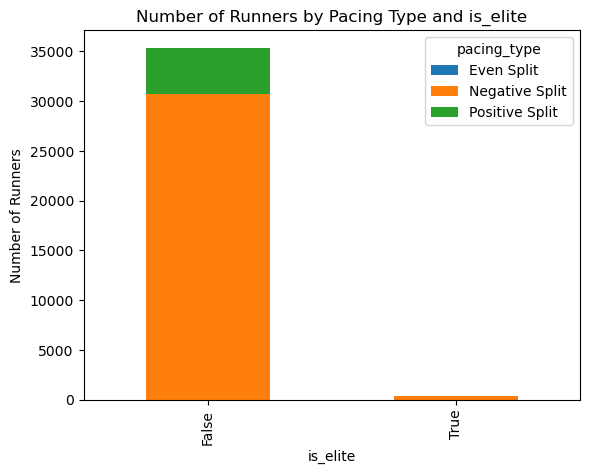

In [238]:
bar_pacing(df_2008, 'is_elite')

In this bar plot and descript, top 1% runner take negative split except for 2 person.

## 3. Hit the wall

1. Create the new column for hit the wall feature.

In [245]:
df_2008['hit_the_wall'] = df_2008['second_half_marathon_minutes'] > (df_2008['halbmarathon_minutes'] * 1.3)
df_2008['hit_the_wall'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 29580    False
16852    False
32751    False
16857    False
22784    False
         ...  
30593    False
2917     False
35230    False
31302    False
28777    False
Name: hit_the_wall, Length: 35716, dtype: bool>

2. Check the datafram to see the correlationsbetween hit and wall and gender/age 

In [283]:
hit_the_wall_by_group = df_2008.groupby(['sex', 'ak', 'hit_the_wall']).size().unstack()
hit_the_wall_by_group['ratio'] = hit_the_wall_by_group[True] / hit_the_wall_by_group[False]
hit_the_wall_by_group

hit_the_wall   False   True     ratio
sex ak                               
M   M30       3015.0  163.0  0.054063
    M35       4302.0  200.0  0.046490
    M40       5832.0  261.0  0.044753
    M45       4893.0  226.0  0.046188
    M50       3150.0  148.0  0.046984
    M55       1644.0   78.0  0.047445
    M60        747.0   43.0  0.057564
    M65        352.0   22.0  0.062500
    M70         99.0    8.0  0.080808
    M75         11.0    NaN       NaN
    M80          2.0    1.0  0.500000
    MH        2741.0  228.0  0.083181
    MJA        131.0   21.0  0.160305
W   W30        931.0   23.0  0.024705
    W35       1120.0   31.0  0.027679
    W40       1571.0   25.0  0.015913
    W45       1316.0   27.0  0.020517
    W50        779.0   15.0  0.019255
    W55        312.0    7.0  0.022436
    W60        109.0    1.0  0.009174
    W65         48.0    NaN       NaN
    W70         10.0    NaN       NaN
    W75          1.0    NaN       NaN
    W80          NaN    1.0       NaN
    WH         998.0   35.0  0.035070
    WJA         37.0    1.0  0.027027

In [247]:
df_2008['finish_time_group'] = pd.qcut(df_2008['netto_minutes'], 4, labels=['Fast', 'Medium', 'Slow', 'Very Slow'])

hit_the_wall_analysis = df_2008.groupby(['finish_time_group', 'hit_the_wall']).size().unstack()

hit_the_wall_analysis

hit_the_wall,False,True
finish_time_group,,
Fast,8878,55
Medium,8817,115
Slow,8625,300
Very Slow,7831,1095


Define a variable for bar graph

In [254]:
def bar_hit_the_wall(df, target):
    hit_the_wall_counts = df.groupby([target, 'hit_the_wall']).size().unstack()

    # Plot the counts as a bar chart
    hit_the_wall_counts.plot(kind='bar', stacked=True)
    plt.title('Number of Runners by Age Group and Hit The Wall Status')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Runners')
    plt.legend(title='Hit The Wall')
    plt.show()

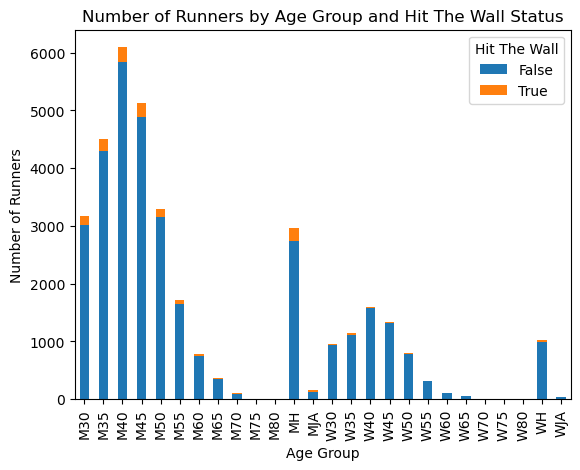

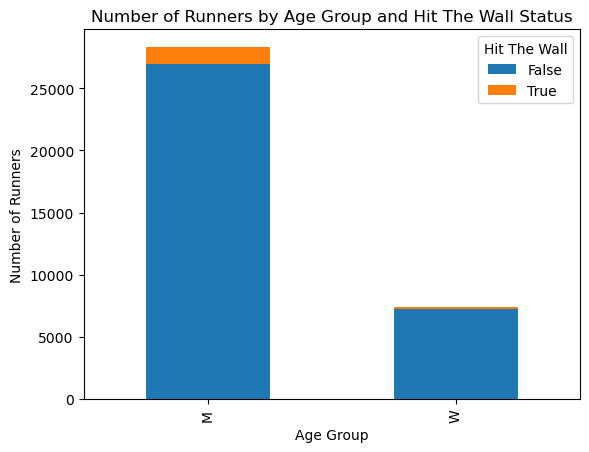

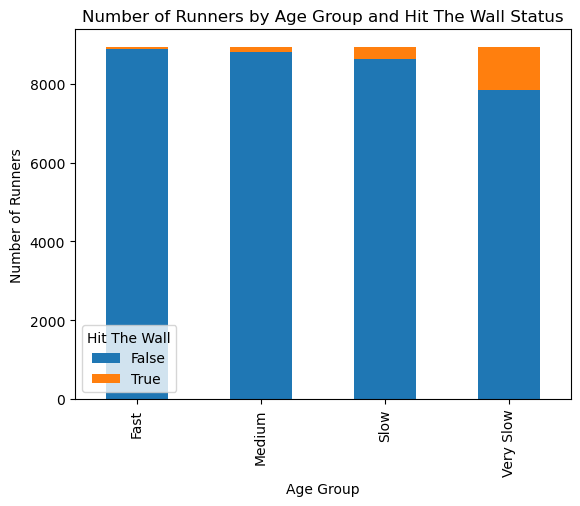

In [255]:
bar_hit_the_wall(df_2008, 'ak')
bar_hit_the_wall(df_2008, 'sex')
bar_hit_the_wall(df_2008, 'finish_time_group')

In this bar plot, I can see that the slower, the more hit the wall people.

But women hit the wall less than man.

It means that women are slower than men regardless pacing generally.

older people are also doesn't hit the wall but slower than other ages regardless pacing generally.

# Task 4

## 1. 2016 task 2

In [267]:
# Calculating descriptive statistics for finish times
descriptive_stats = df_2016['netto_minutes'].describe()

# Converting the range from a single value to a (min, max) tuple
finish_time_range = (df_2016['netto_minutes'].min(), df_2016['netto_minutes'].max())

# Adding the range to the descriptive statistics
descriptive_stats['range'] = finish_time_range

descriptive_stats

count             35987.0
mean           252.638743
std             46.520586
min                123.05
25%            220.016667
50%            247.233333
75%            281.816667
max                521.55
range    (123.05, 521.55)
Name: netto_minutes, dtype: object

Consistantly with 2008, median is lower than the mean(2008: 247) value, and std is even higher(2008: 46)

50% of the people recorded 220_247 (2008: 218~272)

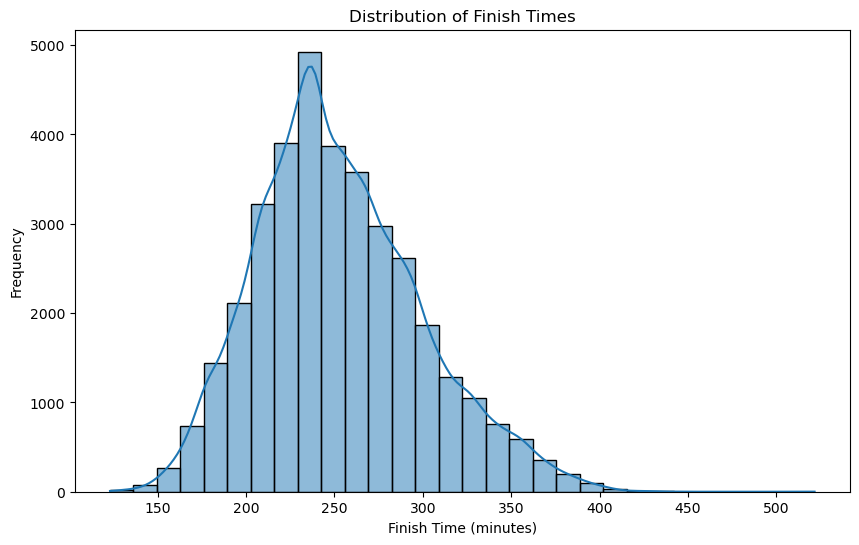

In [269]:
# Plotting the distribution of finish times
plt.figure(figsize=(10, 6))
sns.histplot(df_2016['netto_minutes'], bins=30, kde=True)
plt.title('Distribution of Finish Times')
plt.xlabel('Finish Time (minutes)')
plt.ylabel('Frequency')
plt.show()

The histogram is similar with the 2008 data with a ling right tail.

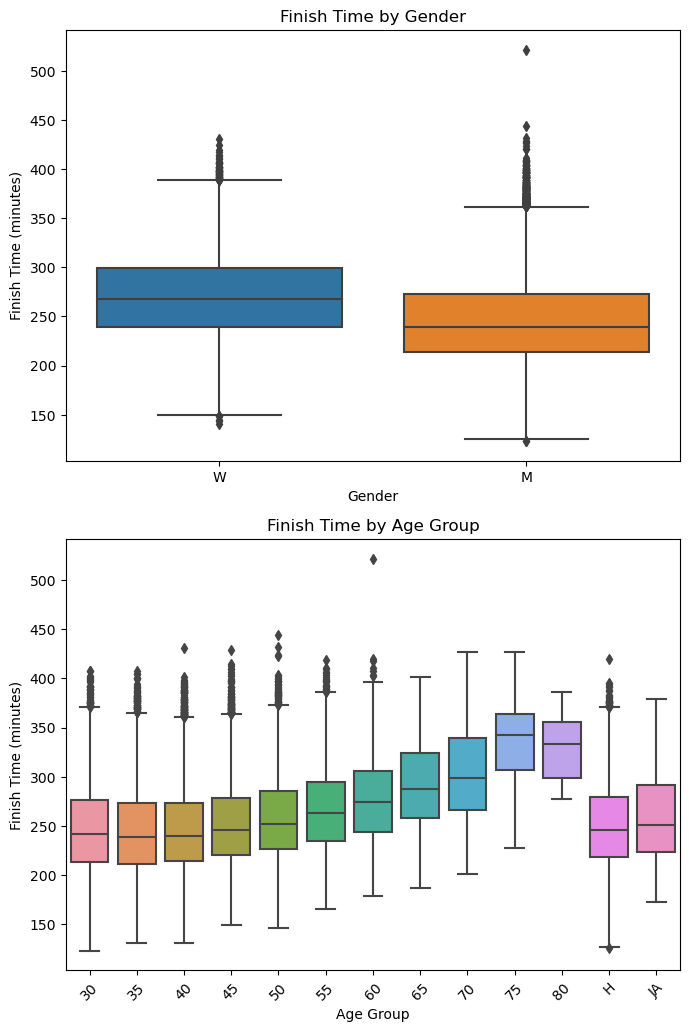

In [271]:
# sort with age group to see it easily
df_2016 =df_2016.sort_values(by = 'ak')

# Finish time by gender
plt.figure(figsize=(7, 15))
plt.subplot(3, 1, 1)
sns.boxplot(x='sex', y='netto_minutes', data=df_2016)
plt.title('Finish Time by Gender')
plt.ylabel('Finish Time (minutes)')
plt.xlabel('Gender')

# Finish time by age group
plt.subplot(3, 1, 2)
sns.boxplot(x='ak', y='netto_minutes', data=df_2016)
plt.title('Finish Time by Age Group')
plt.ylabel('Finish Time (minutes)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In these box plot also, I can see generally male participants are faster than female because female's median and quartiles are higher than male's.

Basically, the participants are younger, the faster like the previous dataset.

As the previous dataset, the upper outliers are more than the other, so noticeably slow participantes are more than the other.

C:\Users\51150\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


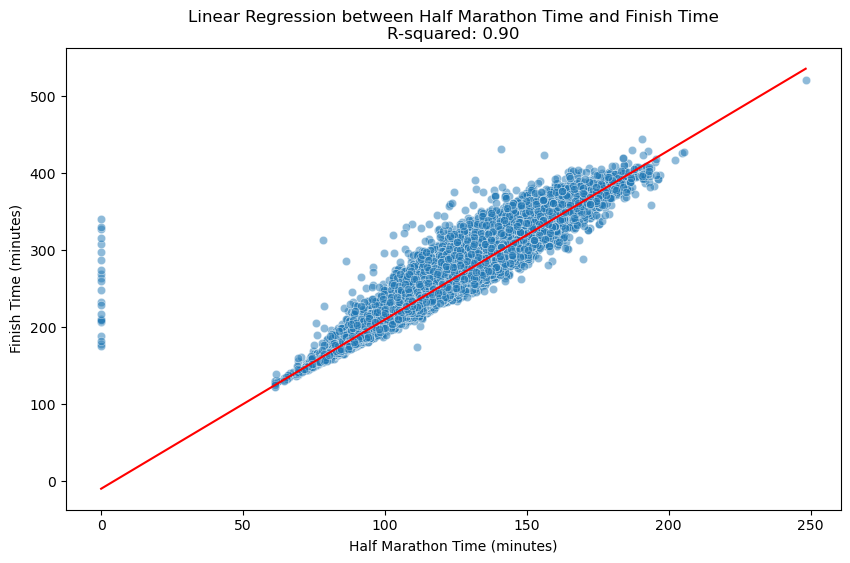

(2.1967729135418836, 0.8950454036357925)

In [279]:
# Preparing the data for linear regression
X = df_2016[['halbmarathon_minutes']]
y = df_2016['netto_minutes']           

# Creating the linear regression model
model = LinearRegression()

# Fitting the model
model.fit(X, y)

# Getting the coefficients
slope = model.coef_[0]
intercept = model.intercept_

# R-squared value
r_squared = model.score(X, y)

# Predictions for visualization
x_fit = np.linspace(X.min(), X.max(), 100)
y_fit = model.predict(x_fit)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='halbmarathon_minutes', y='netto_minutes', data=df_2016, alpha=0.5)
plt.plot(x_fit, y_fit, color='red')  # Regression line
plt.title(f'Linear Regression between Half Marathon Time and Finish Time\nR-squared: {r_squared:.2f}')
plt.xlabel('Half Marathon Time (minutes)')
plt.ylabel('Finish Time (minutes)')
plt.show()

slope, r_squared

Like the first dataset, I could see there is a strong linear positive correlation between half marathon time and finish time because R-squared value is 0.89(2008: 0.90).

And the slope is 2.19(2008: 2.16), which is similar with the previous one.